<a href="https://colab.research.google.com/github/Qitaa/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


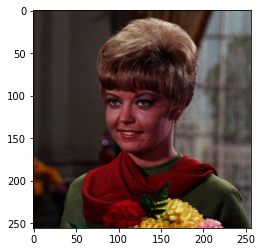

In [4]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)


1. Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan. 


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


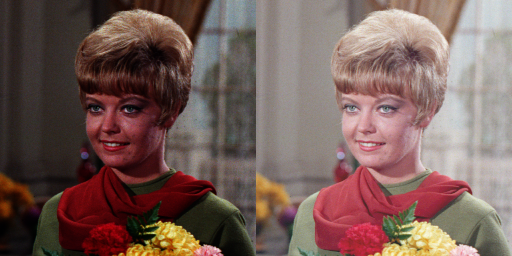

In [5]:
original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255);


final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Percobaan ini hanya memanipulasi warna sehingga jumlah warnanya sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai bit depth: 3


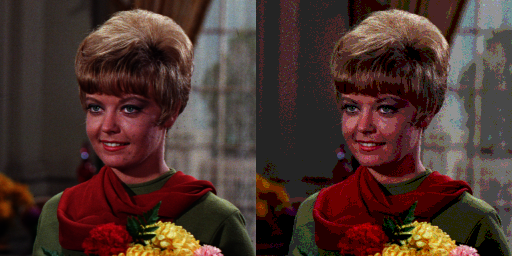

In [6]:
original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg. 
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob). 

>>> cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'): 
 n= cv.imread(img) 
 cv_img.append(n) 

> Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

Nilai PSNR adalah 27.53497095611488 (dB)


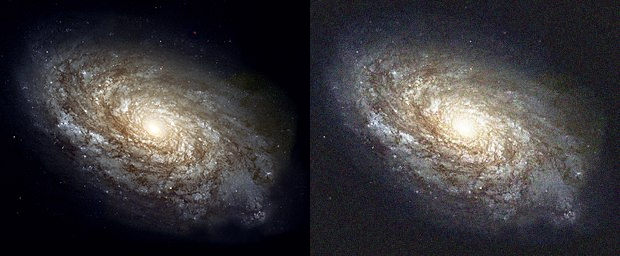

In [11]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 5 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.49353796603343 (dB)


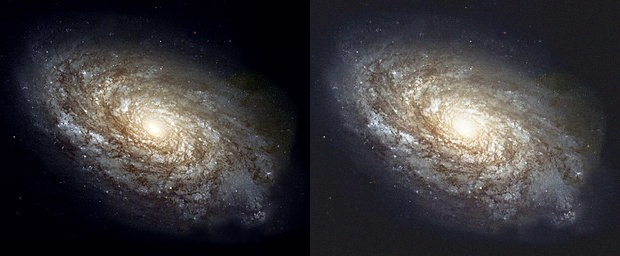

In [10]:
# Average 50
dst = cv_img[0]
noise_number = 50
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50695350919695 (dB)


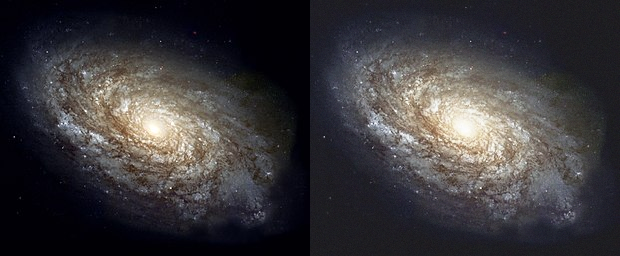

In [12]:
# Average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.515124307401663 (dB)


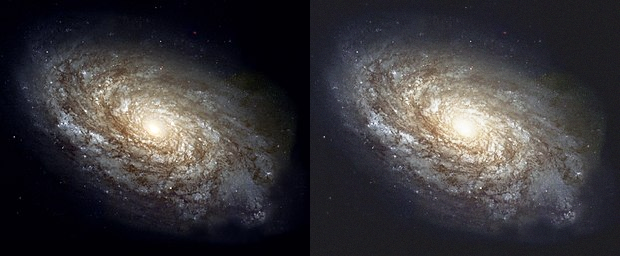

In [13]:
# Average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

>>> Dari hasil pengamatan saya semakin kita menaikan banyak foto yang noise maka hasilnya akan lebih detail yang dimana sebelumnya hanya terlihat hitam akan terlihat ada bintang yang sebelumnya tidak terlihat. Dengan ini PNSR akan membaca citra warna yang mempengaruhi dari gambar original dan gambar noise kita tidak menyebut bahwa semakin banyak image noise yang diproses makin semakin rendah hasil dari PNSR tetapi membacanya ialah seberapa efek image noise dengan image original maka dari hasil PNSR diatas berubah ubah dari 5 – 60 semakin turun PNSR berbanding kebalik 80 – 100 semakin naik hasil PNSRnya.


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/tank.tiff), image tengah adalah mask, sedangkan image kanan adalah hasilnya: 

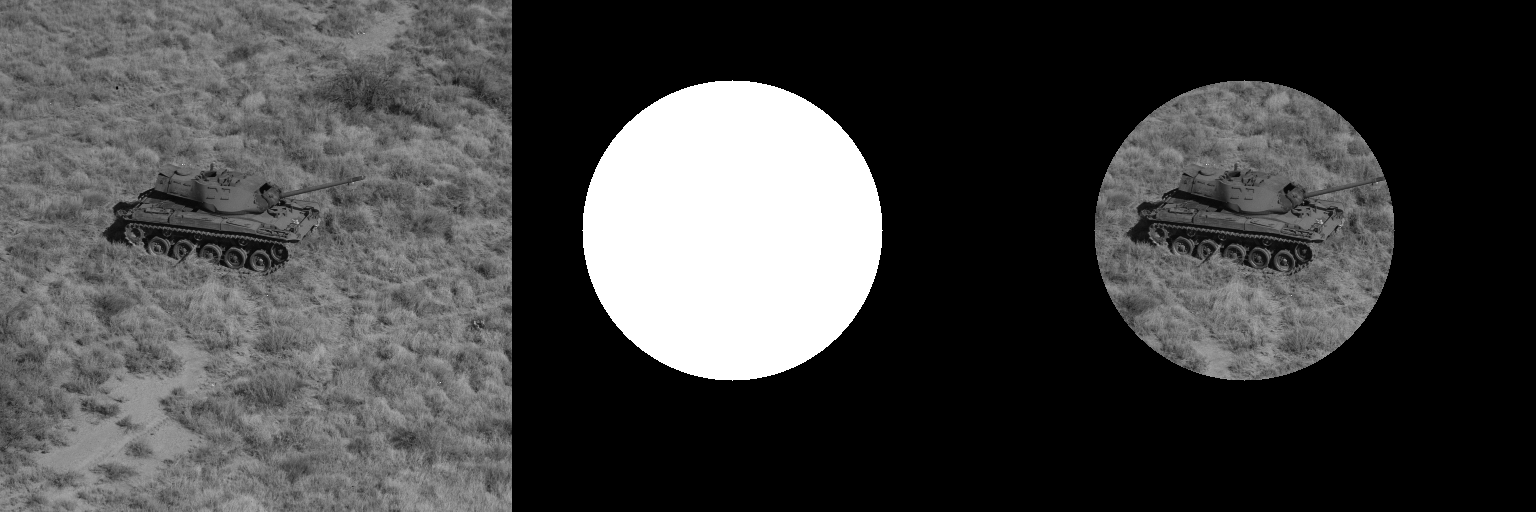

In [30]:
img_t = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (220, 230), 150, (255,255,255), -1)

masked = img_t & mask

tank_frame = cv.hconcat((img_t, mask, masked))
cv2_imshow(tank_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu. 

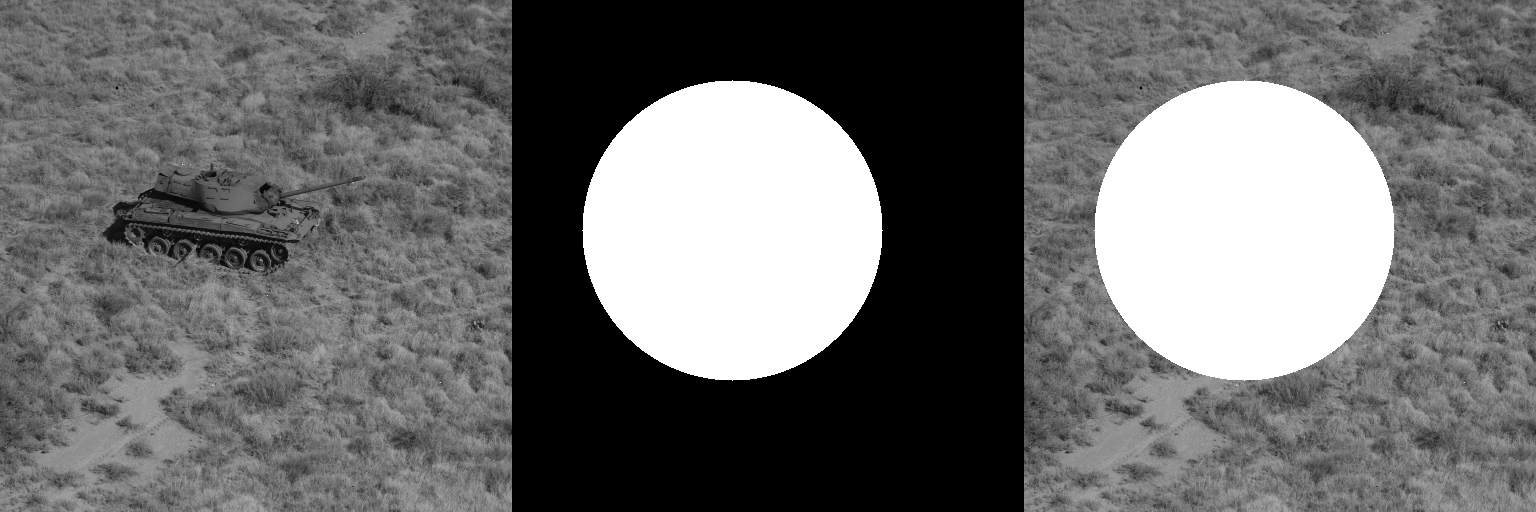

In [31]:
img_t = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (220, 230), 150, (255,255,255), -1)

masked = img_t | mask #{or}

tank_frame = cv.hconcat((img_t, mask, masked))
cv2_imshow(tank_frame)

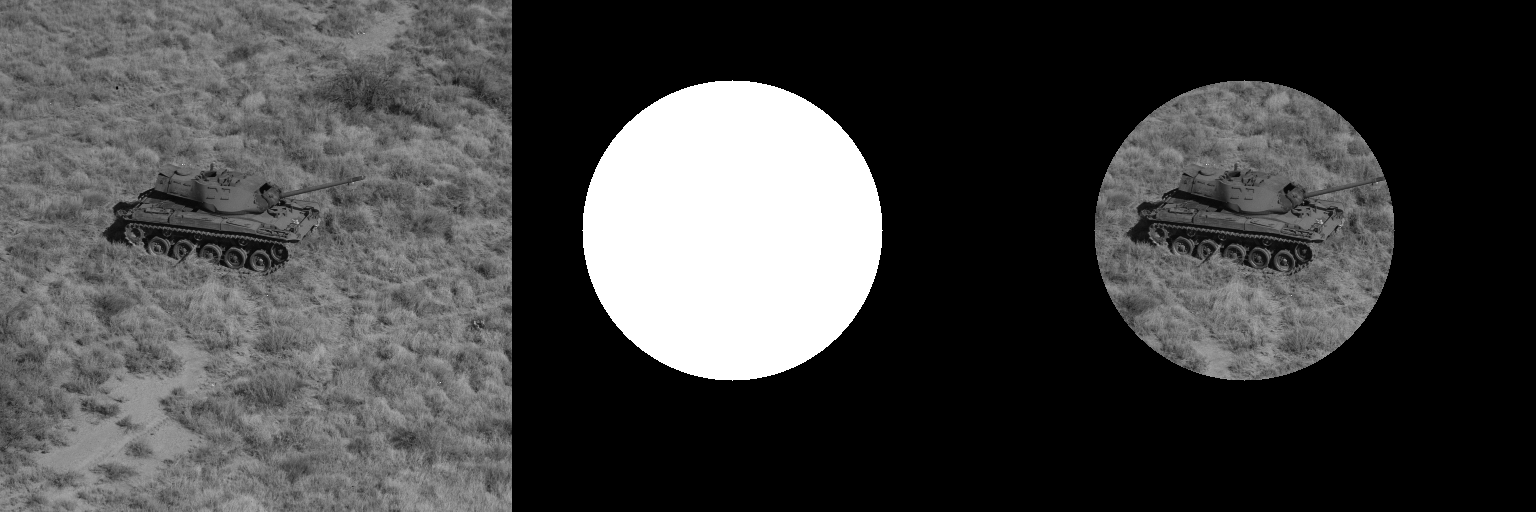

In [32]:
img_t = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (220, 230), 150, (255,255,255), -1)

masked = img_t & mask #{and}

tank_frame = cv.hconcat((img_t, mask, masked))
cv2_imshow(tank_frame)

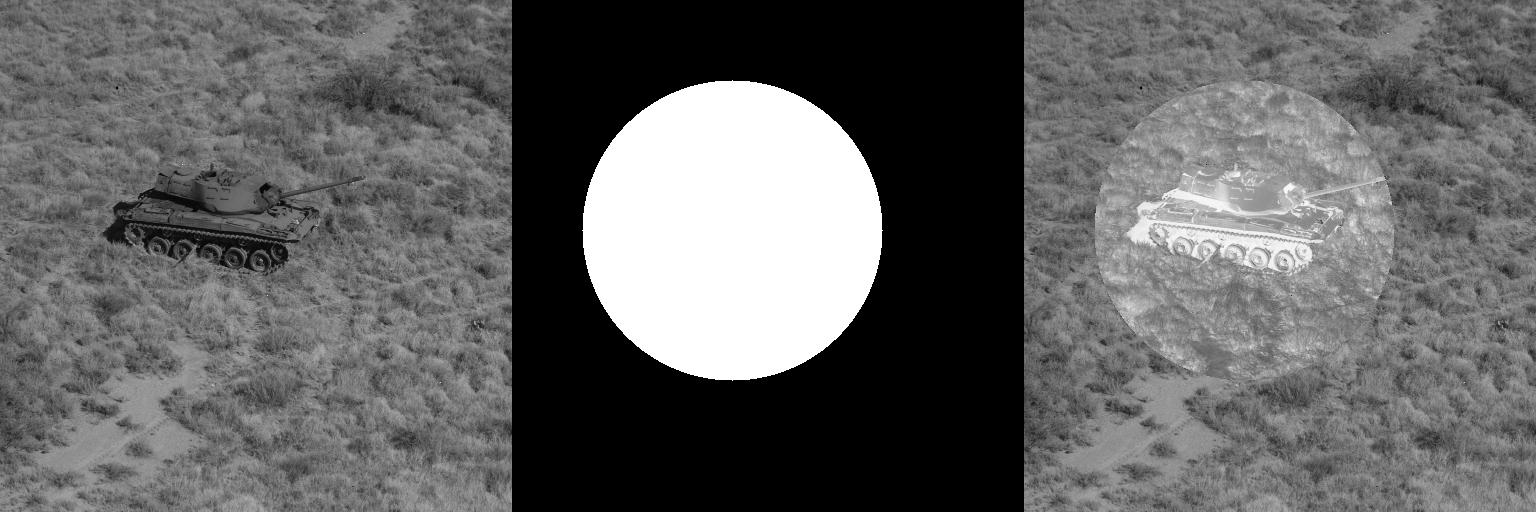

In [33]:
img_t = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (220, 230), 150, (255,255,255), -1)

masked = img_t ^ mask #{and}

tank_frame = cv.hconcat((img_t, mask, masked))
cv2_imshow(tank_frame)


>>>**Hasil analisa** pengerjaan saya bahwa operator logika akan berguna digunakan di pcvk Algoritma ini akan membantu kita untuk mengetahui hasil gambar yang ingin ditampilkan didalam kondisi yang dibutuhkan, maka menggunakan algoritma ini akan sangat mudah untuk menampilkan gambar tertentu.